## Boston Housing Prices

In [6]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [7]:
train_data.shape

(404, 13)

In [8]:
test_data.shape

(102, 13)

In [11]:
test_targets

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
       14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
       20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
       23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
       32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
       26.6,  7.2, 50. , 32.4, 21.6, 29.8, 13.1, 27.5, 21.2, 23.1, 21.9,
       13. , 23.2,  8.1,  5.6, 21.7, 29.6, 19.6,  7. , 26.4, 18.9, 20.9,
       28.1, 35.4, 10.2, 24.3, 43.1, 17.6, 15.4, 16.2, 27.1, 21.4, 21.5,
       22.4, 25. , 16.6, 18.6, 22. , 42.8, 35.1, 21.5, 36. , 21.9, 24.1,
       50. , 26.7, 25. ])

In [12]:
import numpy as np

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [14]:
from keras.models import Sequential
from keras.layers import Dense

In [15]:
def build_model():
  model = Sequential()
  model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(1))

  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [16]:
# K-Fold cross-validation

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
  print('Processing Fold #', i)
  val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]

  partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                       train_data[(i+1) * num_val_samples:]], 
                                      axis=0)
  
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
      train_targets[(i+1) * num_val_samples:]], axis=0)
  
  model = build_model()

  model.fit(partial_train_data, partial_train_targets, 
            epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

Processing Fold # 0
Processing Fold # 1
Processing Fold # 2
Processing Fold # 3


In [17]:
all_scores

[2.212841033935547, 2.11704421043396, 2.627577304840088, 2.361173152923584]

In [18]:
np.mean(all_scores)

2.3296589255332947

In [22]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
  print('Processing Fold #', i)
  val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]

  partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                       train_data[(i+1) * num_val_samples:]], 
                                      axis=0)
  
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
      train_targets[(i+1) * num_val_samples:]], axis=0)
  
  model = build_model()

  history = model.fit(partial_train_data, partial_train_targets, 
                      validation_data=(val_data, val_targets),
                      epochs=num_epochs, batch_size=1, verbose=0)
  
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

Processing Fold # 0
Processing Fold # 1
Processing Fold # 2
Processing Fold # 3


In [23]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

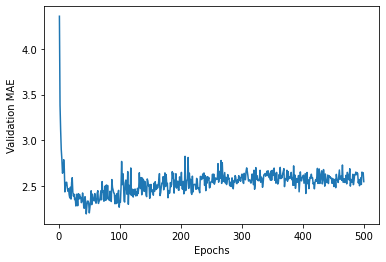

In [25]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

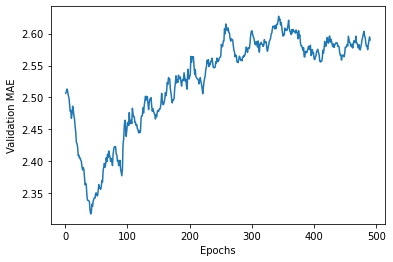

In [27]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smoothed_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smoothed_mae_history) + 1), smoothed_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [28]:
model = build_model()
model.fit(train_data, train_targets, 
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 18.3740 - mae: 2.7959


In [29]:
test_mae_score

2.795900344848633